<a href="https://colab.research.google.com/github/VineetSivadasan/houses/blob/main/ANN_used_with_MNIST_in_handwritten_number_recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt

  from matplotlib.colors import ListedColormap
  from scipy.stats import multivariate_normal as mvn
  
  %matplotlib inline
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNIST_train.csv')
  df.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print_NaN_rows = df[df.isnull().any(axis=1)] #list the rows where NaN appears
print_NaN_rows

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783


In [ ]:
print_None_rows = df[df.eq("None").any(axis=1)]  #check to see if there are any 'None' values in any row
print_NaN_rows.shape

(0, 787)

In [ ]:
# constructing training, validation from MNIST training dataset
def data_train_validate(df, training_set_percent=0.8, validation_set_percent=0.2, seed=None):
  np.random.seed(seed)  #set a random seed number such that the same index sampled here is repeated 
  permutation = np.random.permutation(df.index)  #random selection of the dataframe index
  print(permutation)
  length = len(df.index)  #size of index of dataset
  #print(length)
  training_set_end = int(training_set_percent * length)  #size of the training set
  print(training_set_end)
  training = df.loc[permutation[:training_set_end]] #select random rows up to the size of the training set to form the training dataset
  validation = df.loc[permutation[training_set_end:]] #The remaining rows from the validation set onwards to the end will be the test dataset
  return training, validation

In [ ]:
training, validation = data_train_validate(df)

[27235 47652 13763 ... 57084 38647 53526]
48000


In [ ]:
training.head

<bound method NDFrame.head of        Unnamed: 0  index  labels  0  1  2  3  ...  777  778  779  780  781  782  783
27235       27235  27235       7  0  0  0  0  ...    0    0    0    0    0    0    0
47652       47652  47652       2  0  0  0  0  ...    0    0    0    0    0    0    0
13763       13763  13763       9  0  0  0  0  ...    0    0    0    0    0    0    0
16955       16955  16955       8  0  0  0  0  ...    0    0    0    0    0    0    0
56216       56216  56216       9  0  0  0  0  ...    0    0    0    0    0    0    0
...           ...    ...     ... .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...
42226       42226  42226       8  0  0  0  0  ...    0    0    0    0    0    0    0
28248       28248  28248       4  0  0  0  0  ...    0    0    0    0    0    0    0
34471       34471  34471       0  0  0  0  0  ...    0    0    0    0    0    0    0
42449       42449  42449       5  0  0  0  0  ...    0    0    0    0    0    0    0
50573       50573  50573       5  0

In [ ]:
training_array = training.to_numpy() #turn the training dataset into an array
training_array

array([[27235, 27235,     7, ...,     0,     0,     0],
       [47652, 47652,     2, ...,     0,     0,     0],
       [13763, 13763,     9, ...,     0,     0,     0],
       ...,
       [34471, 34471,     0, ...,     0,     0,     0],
       [42449, 42449,     5, ...,     0,     0,     0],
       [50573, 50573,     5, ...,     0,     0,     0]])

In [ ]:
y_training = training_array[:,2] #extract the label column
y_training

array([7, 2, 9, ..., 0, 5, 5])

In [ ]:
X = np.delete(training_array, [0,1,2], axis=1)
X_training = X/255 

In [ ]:
cmap_bold = ListedColormap(["#FF0000","#00FF00", "#0000FF"])
cmap_light = ListedColormap(["#FFBBBB","#BBFFBB", "#BBBBFF"])

In [ ]:
def linear(H):
  return H
  
def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+ np.exp(-H))

def softmax(H):
  eH=np.exp(H)
  return eH/eH.sum(axis=1, keepdims =True)

def cross_entropy(Y,P_hat):
  return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y,Y_hat):
  return (1/(2*len(Y)))*np.sum((Y - Y_hat)**2)

def one_hot_encode(y):
  N=len(y)
  K = len(set(y))
  Y=np.zeros((N,K))

  for i in range(N):
    Y[i, y[i]]=1

  return Y

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

def R2(y,y_hat):
  return 1- np.sum((y - y_hat)**2)/np.sum((y - y.mean())**2)


def derivative (Z,a):
  if a==linear:
    return 1
  elif a==sigmoid:
    return Z*(1-z)
  
  elif a == np.tanh:
    return 1-Z*Z

  elif a == ReLU:
    return (Z>0).astype(int)
  
  else:
    ValueError("Unknown Activation Function")
  


In [ ]:
class ANN():

  def __init__(self, architecture, activations = None, mode=0):
    self.mode=mode
    self.architecture = architecture
    self.activations = activations 
    self.L = len(architecture)+1

  def fit(self, X, y, eta=1e-3,epochs = 1e3, show_curve=False):
    epochs=int(epochs)
    if self.mode:
      Y=y
    else:
      Y = one_hot_encode(y)

    N, D =X.shape
    K=Y.shape[1]

    #Initialize Weights and Biases
    self.W = {l: np.random.randn(M[0],M[1]) for l,M in enumerate
              (zip(([D]+self.architecture),(self.architecture +[K])),1)}
    self.b = {l: np.random.randn(M) for l, M in enumerate(self.architecture +[K],1)}

    #Activation Function Loading
    if self.activations is None:
      self.a ={l: ReLU for l in range(1, self.L)}
    else:
      self.a ={l:act for l , act in enumerate(self.activations, 1)}

    #Mode Set
    if self.mode:
      self.a[self.L] = linear
    else:
      self.a[self.L] = softmax
    J = np.zeros(epochs)

    #Gradient Descent/ Back Propagation
    for epoch in range(epochs):
      self.forward(X)

      if self.mode:
        J[epoch] = OLS(Y, self.Z[self.L])

      else:
        J[epoch] = cross_entropy(Y, self.Z[self.L])
      
      dH = (1/N)*(self.Z[self.L] -Y)

      for l in sorted(self.W.keys(), reverse =True):
        dW = self.Z[l-1].T@dH
        db = dH.sum(axis=0)

        self.W[l] -= eta*dW
        self.b[l] -= eta*db

        if l>1:
          dZ = dH@self.W[l].T
          dH = dZ*derivative(self.Z[l-1], self.a[l-1])
    

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel('epochs')
      plt.ylabel("$\matchcal{J}")
      plt.title("Training Curve")
      plt.show()
  
  def forward(self,X):
    self.Z ={0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l] + self.b[l])
    return self.Z
  
  def predict(self, X):
    self.forward(X)

    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)



# Training

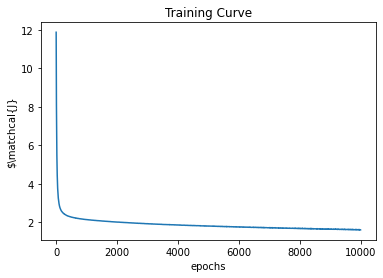

Training Accuracy: 0.4339


In [ ]:
ann = ANN([150, 100, 50, 20, 10], [ReLU, np.tanh, np.tanh])
ann.fit(X_training, y_training, eta = 3e-2, epochs = 1e4, show_curve = True)
y_hat_training = ann.predict(X_training)
print(f"Training Accuracy: {accuracy(y_training, y_hat_training):0.4f}")

# Validation

In [ ]:
validation_array = validation.to_numpy() #turn the training dataset into an array

In [ ]:
y_validation = validation_array[:,2] #extract the label column
y_validation

array([7, 6, 3, ..., 8, 9, 6])

In [ ]:
X = np.delete(validation_array, [0,1,2], axis=1)
X_validation = X/255 

In [ ]:
y_hat_validation = ann.predict(X_validation)  
print(f"Validation Accuracy: {accuracy(y_validation, y_hat_validation):0.4f}")

Validation Accuracy: 0.3266


# Test

In [ ]:
 df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNIST_test.csv')

In [ ]:
print_NaN_rows_test = df_test[df_test.isnull().any(axis=1)] #list the rows where NaN appears
print_NaN_rows_test

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783


In [ ]:
print_None_rows_test = df_test[df_test.eq("None").any(axis=1)]  #check to see if there are any 'None' values in any row
print_NaN_rows_test.shape

(0, 787)

In [ ]:
test_array = df_test.to_numpy() #turn the training dataset into an array
test_array

array([[   0,    0,    7, ...,    0,    0,    0],
       [   1,    1,    2, ...,    0,    0,    0],
       [   2,    2,    1, ...,    0,    0,    0],
       ...,
       [9997, 9997,    4, ...,    0,    0,    0],
       [9998, 9998,    5, ...,    0,    0,    0],
       [9999, 9999,    6, ...,    0,    0,    0]])

In [ ]:
y_test = test_array[:,2] #extract the label column
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
X = np.delete(test_array, [0,1,2], axis=1)
X_test = X/255 

In [ ]:
y_hat_test = ann.predict(X_test)  
print(f"Test Accuracy: {accuracy(y_test, y_hat_test):0.4f}")

Test Accuracy: 0.3373


In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/MyFont-Envelope-Sample.jpg')

In [ ]:
img, img.shape

(array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [ ]:
compressed_img = img.shape/28

TypeError: ignored